In [27]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [28]:
BATCH_SIZE=16
IMAGE_SIZE=128
CHANNELS=3
EPOCHS=45

In [29]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 55572 files belonging to 30 classes.


In [30]:
class_names=dataset.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight']

(16, 128, 128, 3)
[ 1 20 23 10 25 25  4 20 15 24 25  5  4  4 14 27]


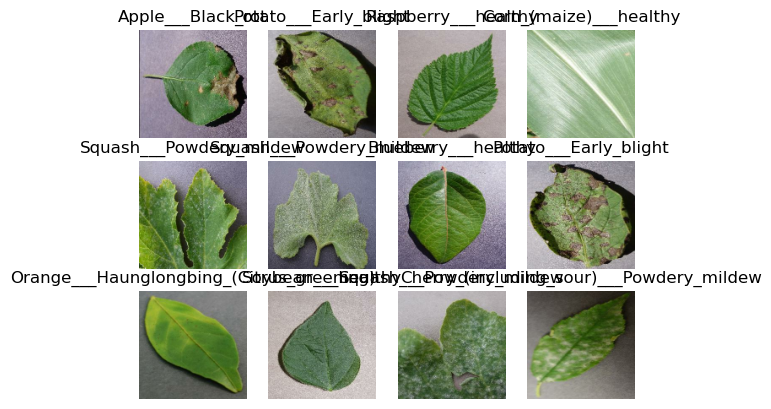

In [31]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [32]:
def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split) == 1
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds
    

In [33]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [34]:
len(train_ds)

2779

In [35]:
len(val_ds)

347

In [36]:
len(test_ds)

348

In [37]:
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [38]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [39]:
data_augmentation

In [40]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # No need to include BATCH_SIZE here
n_classes = 30

model = models.Sequential([
    layers.Input(shape=input_shape),  # Explicitly define the input shape
    resize_and_rescale,               # Assuming resize_and_rescale is defined somewhere else in your code
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])



In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)       

In [42]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [43]:
history=model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=45
)

Epoch 1/45
2779/2779 [==============================] - 878s 291ms/step - loss: 1.5317 - accuracy: 0.5286 - val_loss: 0.6392 - val_accuracy: 0.7913
Epoch 2/45
2779/2779 [==============================] - 865s 281ms/step - loss: 0.5107 - accuracy: 0.8318 - val_loss: 0.2929 - val_accuracy: 0.9002
Epoch 3/45
2779/2779 [==============================] - 670s 221ms/step - loss: 0.3185 - accuracy: 0.8929 - val_loss: 0.2056 - val_accuracy: 0.9305
Epoch 4/45
2779/2779 [==============================] - 686s 223ms/step - loss: 0.2379 - accuracy: 0.9203 - val_loss: 0.1376 - val_accuracy: 0.9537
Epoch 5/45
2779/2779 [==============================] - 669s 217ms/step - loss: 0.1911 - accuracy: 0.9370 - val_loss: 0.1765 - val_accuracy: 0.9406
Epoch 6/45
2779/2779 [==============================] - 664s 216ms/step - loss: 0.1679 - accuracy: 0.9440 - val_loss: 0.1379 - val_accuracy: 0.9548
Epoch 7/45
2779/2779 [==============================] - 664s 216ms/step - loss: 0.1490 - accuracy: 0.9506 - val_

KeyboardInterrupt: 

In [44]:
scores=model.evaluate(test_ds)

history.params

348/348 [==============================] - 86s 47ms/step - loss: 0.0939 - accuracy: 0.9691


{'verbose': 1, 'epochs': 1, 'steps': 2779}

In [45]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

First image to predict
Actual Label: Pepper,_bell___Bacterial_spot
1/1 [==============================] - 1s 519ms/step
Predicted Label: Pepper,_bell___Bacterial_spot


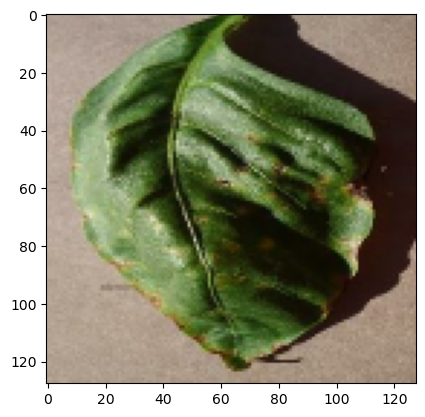

In [22]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:",class_names[labels_batch[0].numpy()])
    batch_prediction=model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [46]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)
    predictions=model.predict(img_array)
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(1000*(np.max(predictions[0])),2)
    return predicted_class, confidence
    

1/1 [==============================] - 0s 25ms/step


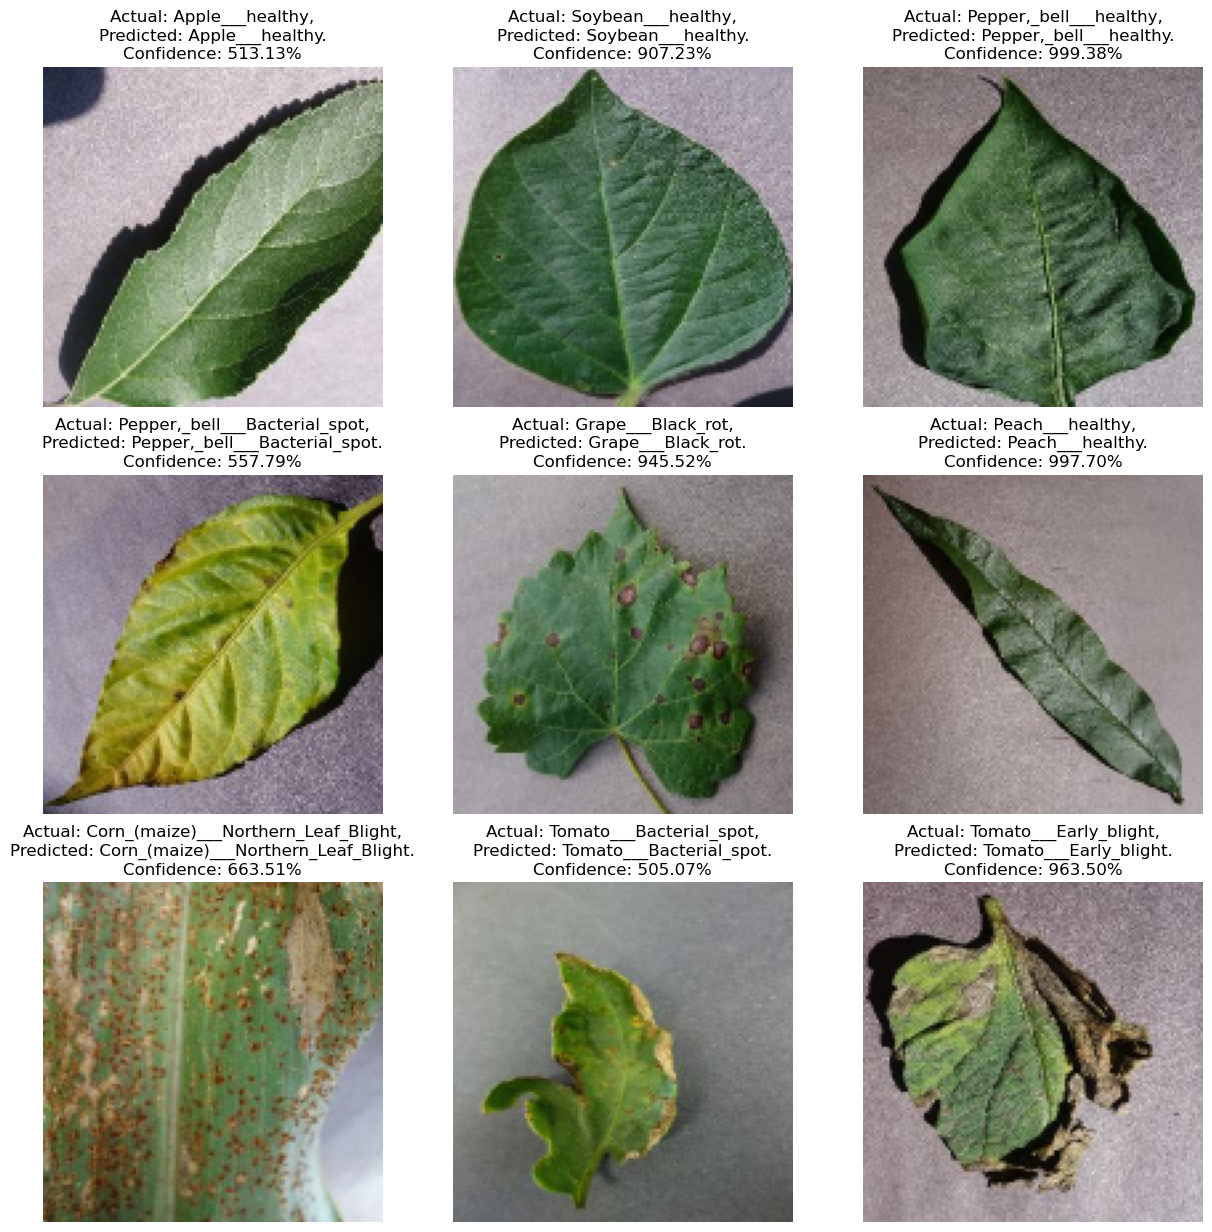

In [47]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Fix method chaining and remove misplaced comma
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}.\nConfidence: {confidence:.2f}%")  # Fixed syntax
        plt.axis("off")

In [49]:
import os
import tensorflow as tf

# Define the base directory
base_dir = 'models/'

# Create the base directory if it does not exist
os.makedirs(base_dir, exist_ok=True)

# Define the directory path for the new model version, specifically "3"
model_dir = os.path.join(base_dir, '1')

# Create the directory for version 3
os.makedirs(model_dir, exist_ok=True)

# Save the model in TensorFlow SavedModel format in the "3" directory
tf.keras.models.save_model(model, model_dir, save_format='tf')

# Rename the `saved_model.pb` to other desired filenames within the "3" directory
saved_model_pb_path = os.path.join(model_dir, 'saved_model.pb')

fingerprint_pb_path = os.path.join(model_dir, 'fingerprint.pb')
keras_metadata_pb_path = os.path.join(model_dir, 'metadata_keras.pb')

# Copy the saved model file to create the required files
tf.io.gfile.copy(saved_model_pb_path, fingerprint_pb_path, overwrite=True)
tf.io.gfile.copy(saved_model_pb_path, keras_metadata_pb_path, overwrite=True)

print(f"Model saved in directory: {model_dir}")
print(f"Files saved as:\n- Saved Model: {saved_model_pb_path}\n- Fingerprint: {fingerprint_pb_path}\n- Keras Metadata: {keras_metadata_pb_path}")


INFO:tensorflow:Assets written to: models/1\assets


INFO:tensorflow:Assets written to: models/1\assets


Model saved in directory: models/1
Files saved as:
- Saved Model: models/1\saved_model.pb
- Fingerprint: models/1\fingerprint.pb
- Keras Metadata: models/1\metadata_keras.pb
